###Res class
Operates on individual .rei or .res files
* information on observation type (e.g. heads, fluxes) and also x, y location can be added via an observation information file
(same as for Rei class)
* the **obsinfo** attribute (dataframe) has the location and/or type of all observation, read in from the observation information file
* the **df** attribute is a dataframe containing all of the information from the res or rei file, and is used to build a phi dataframe
* the **phi** attribute (dateframe) has phi contribution for each observation, join with information from the obsinfo file (if any)

In [1]:
import sys
sys.path.append('../pestools')
from res import *

% matplotlib inline
res = Res('../cc/columbia_svda.rei.16', obs_info_file='../cc/observation_locations.csv')

In [2]:
res.df.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual
7089222501_b,7089222501_b,head_best,858.13,850.1707,7.959346,0.2,1.591869,7.959346,1.591869,2.534048
1089192101_b,1089192101_b,head_best,893.24,891.5156,1.724436,0.2,0.344887,1.724436,0.344887,0.118947
2089103101_b,2089103101_b,head_best,924.60,909.9240,14.675990,0.2,2.935198,14.675990,2.935198,8.615387
3089103201_b,3089103201_b,head_best,911.44,910.1028,1.337156,0.2,0.267431,1.337156,0.267431,0.071519
2089475301_b,2089475301_b,head_best,729.25,733.7051,-4.455139,0.2,-0.891028,4.455139,0.891028,0.793931


In [3]:
res.obsinfo.head()

,X,Y,Type,Group
7089222501_b,570954.8275,296365.6586,head,head_best
1089192101_b,575025.8740,304202.1060,head,head_best
2089103101_b,586985.0743,304340.3521,head,head_best
3089103201_b,586962.2041,304370.9770,head,head_best
2089475301_b,536391.8551,305263.7315,head,head_best


In [4]:
res.phi.head()

,Weighted_Sq_Residual,X,Y,Type,Group
7089222501_b,2.534048,570954.8275,296365.6586,head,head_best
1089192101_b,0.118947,575025.8740,304202.1060,head,head_best
2089103101_b,8.615387,586985.0743,304340.3521,head,head_best
3089103201_b,0.071519,586962.2041,304370.9770,head,head_best
2089475301_b,0.793931,536391.8551,305263.7315,head,head_best


In [5]:
res.phi_by_group.head()

,Weighted_Sq_Residual,Type
Group,,
cc_streams,11.261053,baseflow
dhdz,1007.118587,vertical head difference
head_best,189.855254,head
head_fair,557.776564,head
head_good,623.410195,head


###Customized grouping from information in observation info file
####group by a unique entry in a column:

In [6]:
res.phi[res.phi.Type == 'vertical head difference']

,Weighted_Sq_Residual,X,Y,Type,Group
rio34_diff,0.486997,579845.720,329653.5991,vertical head difference,dhdz
rio46_diff,937.524386,579845.720,329653.5991,vertical head difference,dhdz
arl34_diff,24.413273,573068.296,314776.4022,vertical head difference,dhdz
arl46_diff,44.693931,573068.296,314776.4022,vertical head difference,dhdz


####group by column entries containing specific string (for example, get all observations for the Fox River):

In [7]:
res.phi[[True if 'fox' in n else False for n in res.phi.index]]

,Weighted_Sq_Residual,X,Y,Type,Group
4072743_foxrive,1.660959,574111.0320,368286.5330,baseflow,lrg_streams
40727335_foxriv,0.000000,568695.4220,355560.3450,baseflow,zero_streams
4072480_foxrive,0.059789,565918.1875,342543.0625,baseflow,lrg_streams
4072400_foxrive,7.960490,582356.0000,346007.7500,baseflow,lrg_streams
4072430_foxrive,151.358236,577147.7500,341333.5625,baseflow,sm_streams


####multiple criteria:

In [8]:
res.phi[[True if 'fox' in n else False for n in res.phi.index] & (res.phi.Group == 'lrg_streams')]

,Weighted_Sq_Residual,X,Y,Type,Group
4072743_foxrive,1.660959,574111.0320,368286.5330,baseflow,lrg_streams
4072480_foxrive,0.059789,565918.1875,342543.0625,baseflow,lrg_streams
4072400_foxrive,7.960490,582356.0000,346007.7500,baseflow,lrg_streams


In [9]:
res.describe_groups('head_good').ix[['Mean', 'MAE', 'RMSE']]

,Group summary
Mean,-2.704151
MAE,15.54417
RMSE,24.49298


In [10]:
res.description

,n,Range,Max,Min,Mean,Standard deviation,Varience,25%,50%,75%,Max (absolute),Min (absolute),MAE,RMSE,RMSE/range,Normally Distributed,p-value
cc_streams,37,2496850,1402350,-1094500,109268.1,461499.8,2.12982e+11,-17015,128220,341000,1402350,7250,322764.6,468150.9,0.1874966,True,0.002070555
dhdz,4,3.730437,3.061902,-0.6685352,0.8279444,1.63927,2.687206,-0.2194727,0.4592053,1.506622,3.061902,0.06978516,1.197105,1.64344,0.440549,False,0.6010302
head_best,15,75.72296,36.76899,-38.95397,-0.5894,18.40258,338.655,-5.275362,1.724436,8.545752,38.95397,1.208159,12.58444,17.78835,0.2349136,False,0.2145584
head_fair,903,240.836,80.56311,-160.2729,-7.25643,22.47088,504.9404,-17.06405,-4.727051,3.854425,160.2729,0.03363037,16.17359,23.60163,0.09799876,True,1.804073e-20
head_good,26,122.5109,64.56845,-57.94247,-2.704151,24.82534,616.2975,-5.220712,-0.8452456,6.881475,64.56845,0.3562622,15.54417,24.49298,0.1999249,True,0.00465009
head_poor,265,405.3654,204.6335,-200.7319,-12.43844,38.91341,1514.253,-25.36285,-8.068298,5.373901,204.6335,0.06878662,26.1597,40.78301,0.100608,True,1.264565e-13
headwaters,17,761980,158370,-603610,-100964.3,209480.1,4.38819e+10,-265935,-61098.5,54839,603610,11865,172552,226923.8,0.2978081,False,0.2524266
lrg_streams,24,7295250,4669500,-2625750,155710.2,1520234,2.31111e+12,-462850,-288950,459400,4669500,95150,999835.2,1496349,0.2051127,True,0.006094412
sm_streams,14,1646585,260385,-1386200,-407688.9,532287.2,2.833296e+11,-809075,-174962.5,-20046.25,1386200,3475,476406.8,655211.5,0.3979214,False,0.179482
wcrs1,2995,423.267,193.2158,-230.0512,-0.5078302,21.64913,468.6847,-7.247637,0.3458325,6.50047,230.0512,0.001933594,12.08811,21.65147,0.05115322,True,0


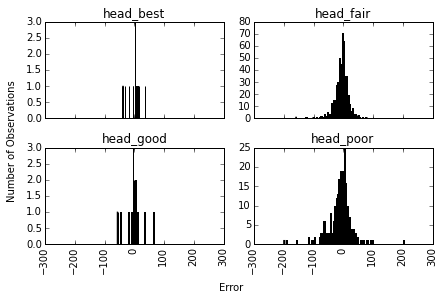

In [11]:
fig, axes = res.plot_hist(groupinfo=['head_best', 'head_good', 'head_fair', 'head_poor'], color='k')